# TASK-5 Exploratory Data Analysis - Sports

     - Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'.
     - As a sports analyst,find out most successful teams, players and factors contributing win or loss.
     - Suggest teams or player a company should endorse for its products.
     - You can choose any of the tool of your choice (Python/R/Tableau/PowerBl/Excel/SAP/SAS).

In [1]:
# Importing Libraries
# To Do numirical Calculations
import numpy as np

# To handle the dataframe
import pandas as pd

# To visualise the dadapoints
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
# matches data
matches_data = pd.read_csv('matches.csv')

# Score data
score_data = pd.read_csv('deliveries.csv')

In [3]:
# Fetch five records of matches data
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Fetch five records of Score data
score_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
# Fetch the information about basic datatypes and no of records
print(matches_data.info())
print("--------------------------------------------------------------------------------------------------------------\n")
print(score_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# Take information about umpire feature
matches_data['umpire3'].tail(10)

746              Nanda Kishore
747      KN Ananthapadmanabhan
748                Nitin Menon
749               Ulhas Gandhe
750             Bruce Oxenford
751                     S Ravi
752                  Ian Gould
753                        NaN
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, dtype: object

In [9]:
# Find the if there any missing records are present or not in umpire feature
matches_data['umpire3'].isnull().sum()

637

In [10]:
# Find the central tendeny of the Matches data
matches_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,1792.178571,3464.478148,1.0,189.75,378.5,567.25,11415.0
season,756.0,2013.444444,3.366895,2008.0,2011.00,2013.0,2016.00,2019.0
dl_applied,756.0,0.025132,0.156630,0.0,0.00,0.0,0.00,1.0
win_by_runs,756.0,13.283069,23.471144,0.0,0.00,0.0,19.00,146.0
win_by_wickets,756.0,3.350529,3.387963,0.0,0.00,4.0,6.00,10.0


In [13]:
# Find which Team won by maximum runs

matches_data.iloc[matches_data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [14]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [15]:
# which Team won by maximum wickets

matches_data.iloc[matches_data['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [16]:
matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [17]:
# Which Team won by minimum runs

matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [18]:
matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]["winner"]

'Mumbai Indians'

In [19]:
# which Team won by min wickets

matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [20]:
matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

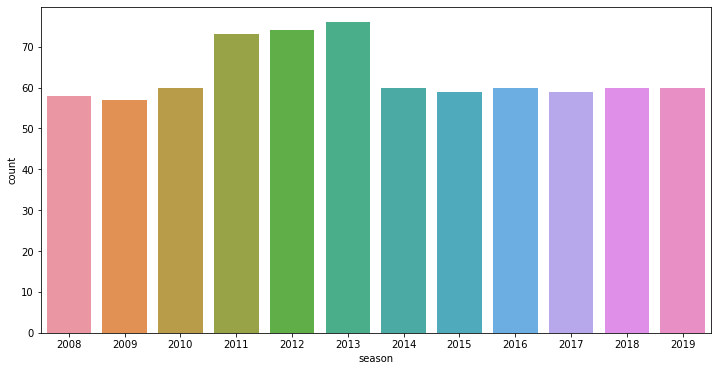

In [21]:
# Which Season which had most number of matches

plt.figure(figsize=(12,6))
sns.countplot(x='season', data=matches_data)
plt.show()

From above plot we can say that in year 2013 we have had most number of matches.

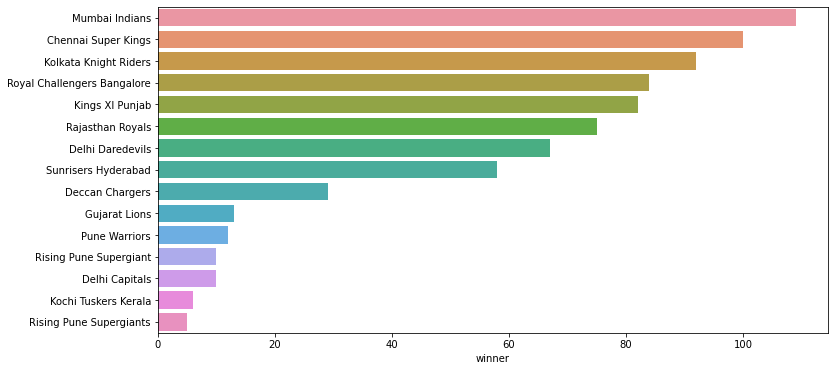

In [22]:
# Which Team with most wins

plt.figure(figsize=(12,6))
data = matches_data.winner.value_counts()
sns.barplot(y=data.index, x=data, orient='h')
plt.show()

From above plot we can say that Mumbai Indians have won most matches.

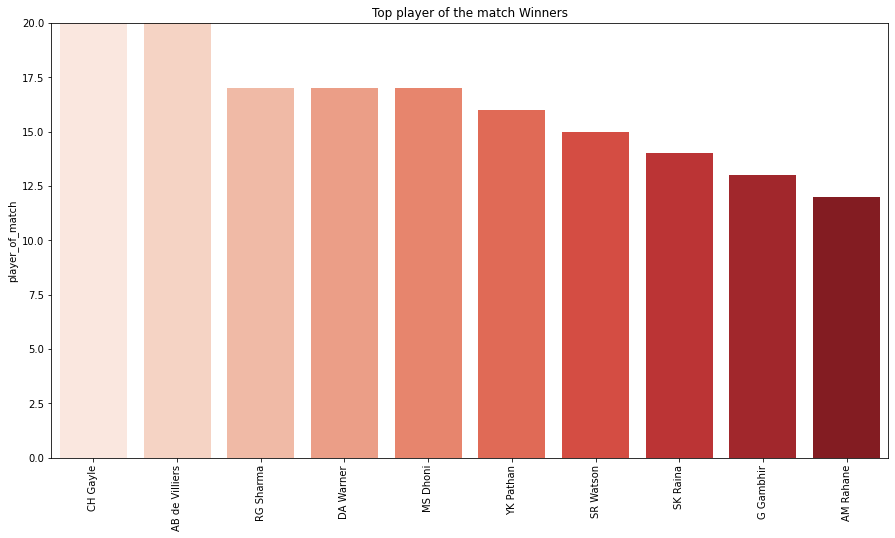

In [23]:
# List down the Top player of the match winners

top_players = matches_data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Reds");
plt.show()

From above plot we can say that CH GAYLE has won maximum number of palyer of the match awards.

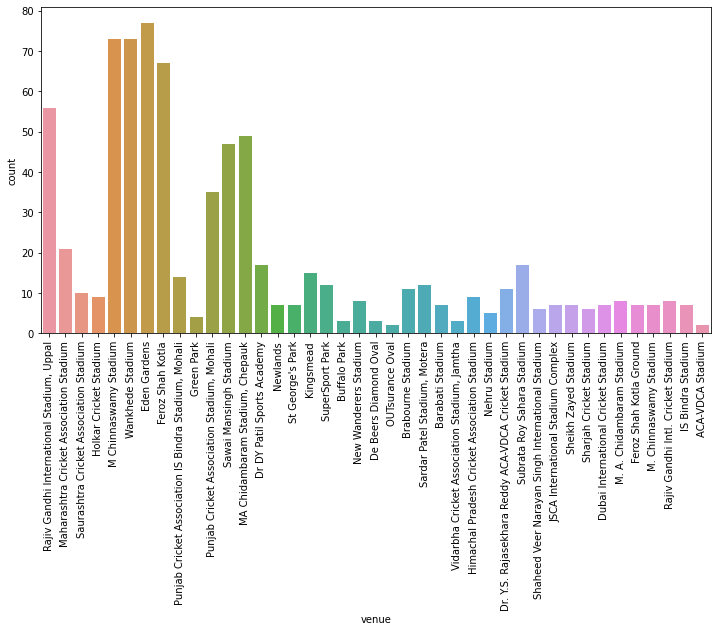

In [24]:
# List down Number of matches in each venue

plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches_data)
plt.xticks(rotation='vertical')
plt.show()

From above plot we can clearly say that Eden Garden is the stadium where most of the matches are played.

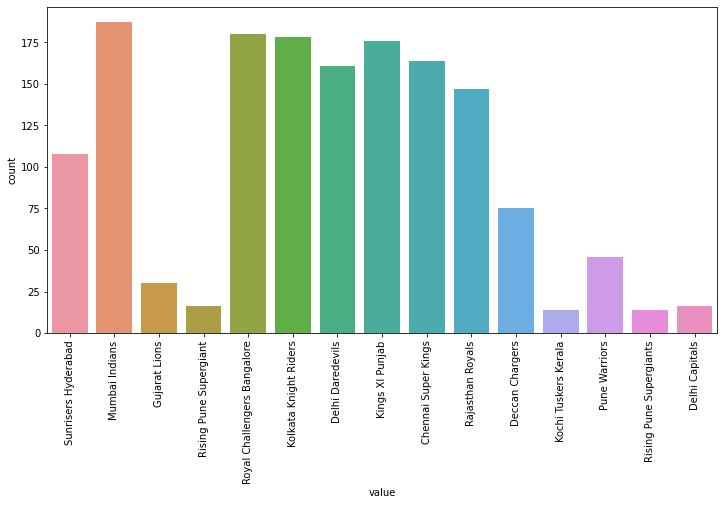

In [25]:
# find Number of matches played by each team

temp_df = pd.melt(matches_data, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

From above plot we can say that Mumbai Indians have played the most number of matches

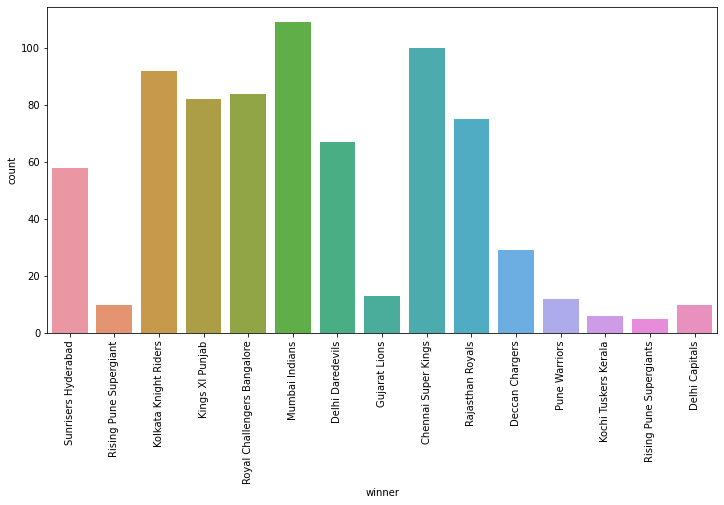

In [26]:
# find Maximum wins per team

plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=matches_data)
plt.xticks(rotation=90)
plt.show()

From above plot we can say that Mumbai Indians have won the most number of matches

In [27]:
# Champions each season

champ_df = matches_data.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champ_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


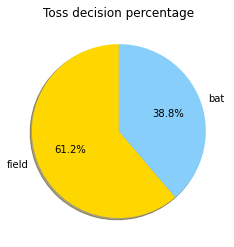

In [28]:
# Toss decision

temp_series = matches_data.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

From above pie chart we can conclude that most of the teams prefer to field first.

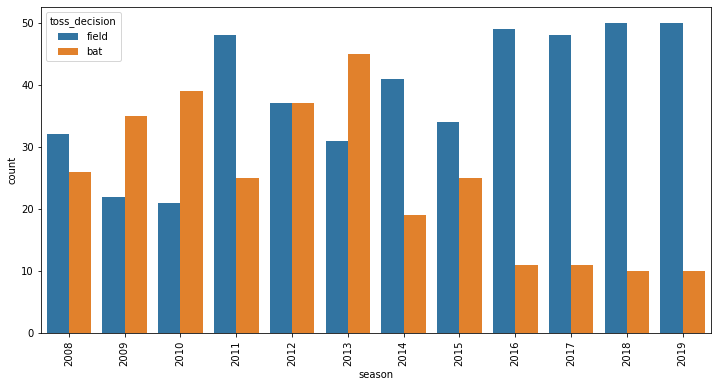

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches_data)
plt.xticks(rotation='vertical')
plt.show()

But from above graph it can be conculded that during inital years teams winning the toss used to opt bat first but from last 4-5 years trend have changed and teams have decided to choose field first.

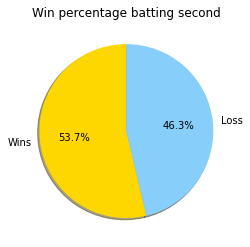

In [30]:
num_of_wins = (matches_data.win_by_wickets>0).sum()
num_of_loss = (matches_data.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

From above pie chart we can say that teams batting second have won more matches than those batting first.

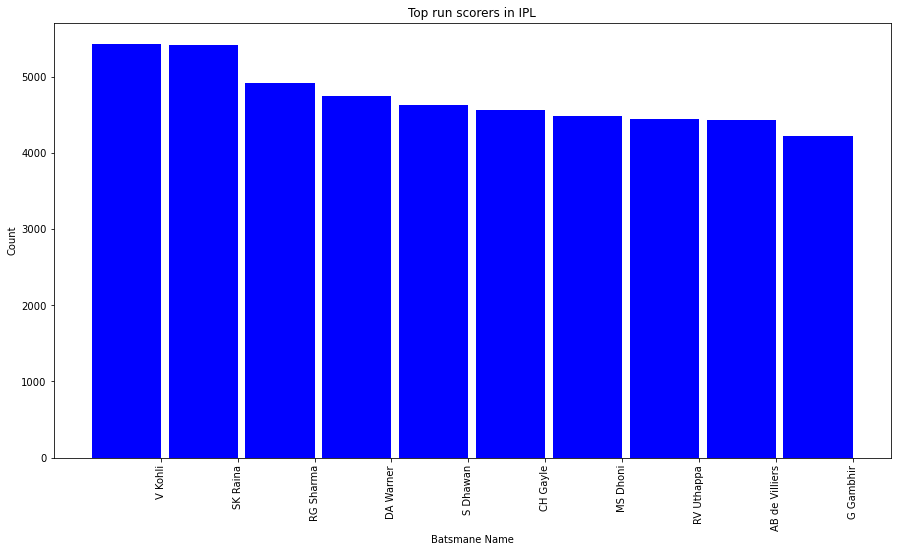

In [31]:
# Most runs by a batsmen

temp_df = score_data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
plt.show()

From above graph we can say that Virat Kohli has scored most runs.

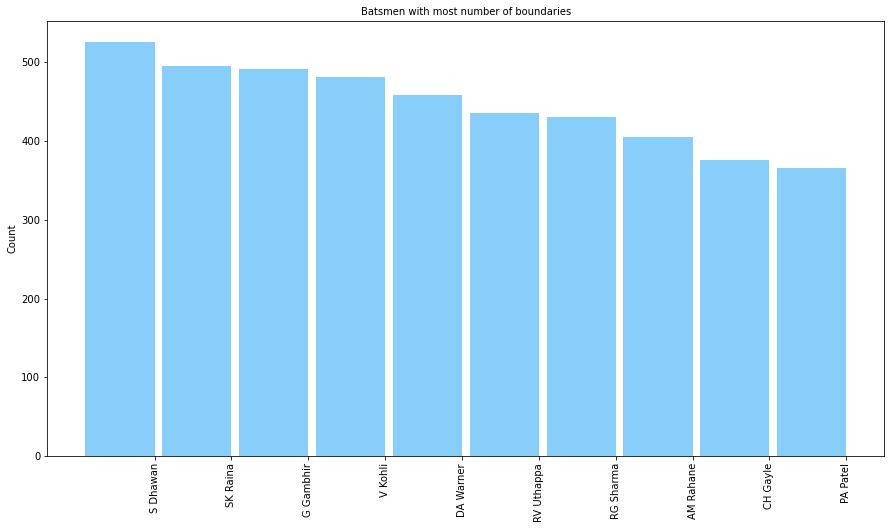

In [32]:
# Most boundaries(4's) by a batsmen

temp_df = score_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsmen with most number of boundaries",fontsize = 10)
plt.show()

From above plot its clear that S Dhawan has hit most boundaries(4's).

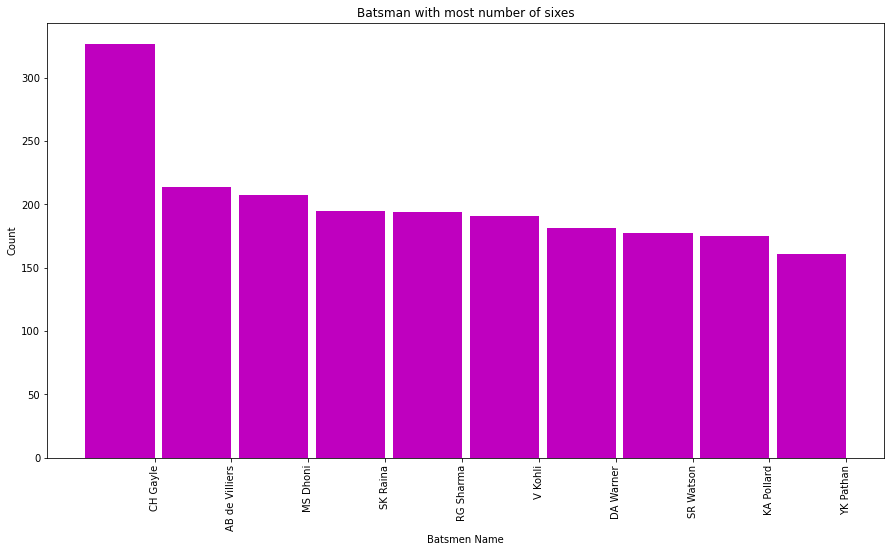

In [33]:
# Most 6's by a batsmen

temp_df = score_data.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes")
ax.set_xlabel('Batsmen Name')
plt.show()

From above plot its clear that CH Gayle has hit most 6's.

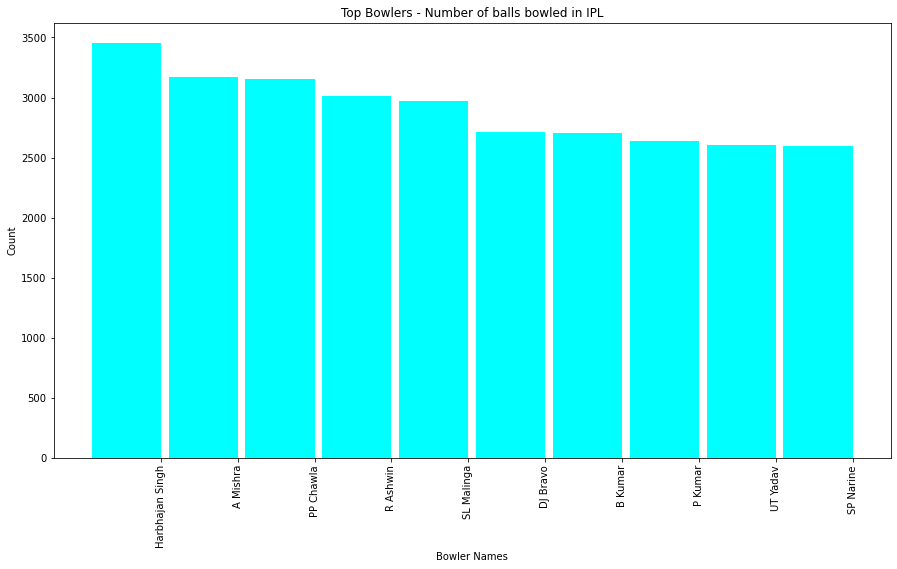

In [34]:
# Bowler with most number of balls bowled

temp_df = score_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

Harbhajan Singh has bowled the most number of balls.

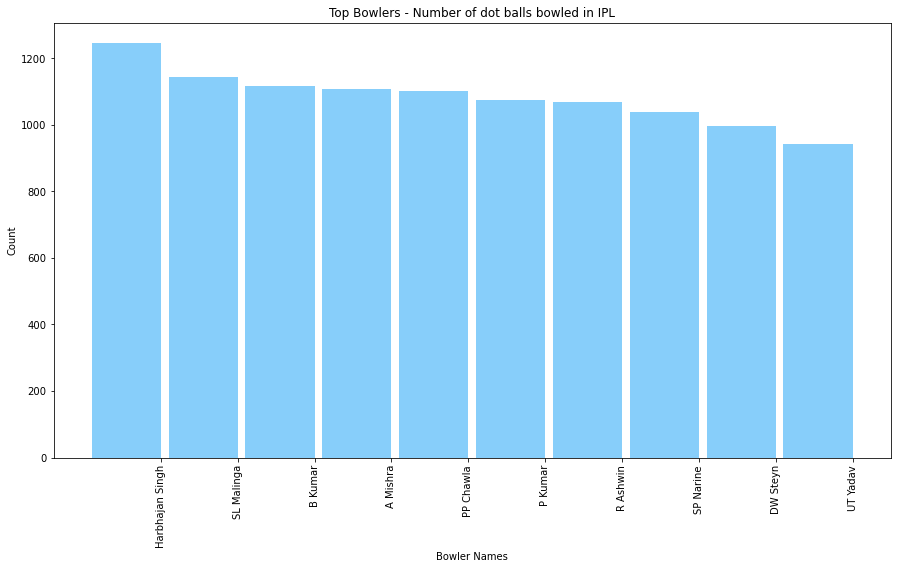

In [35]:
temp_df = score_data.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

Harbhajan Singh has bowled most number of dot balls also.

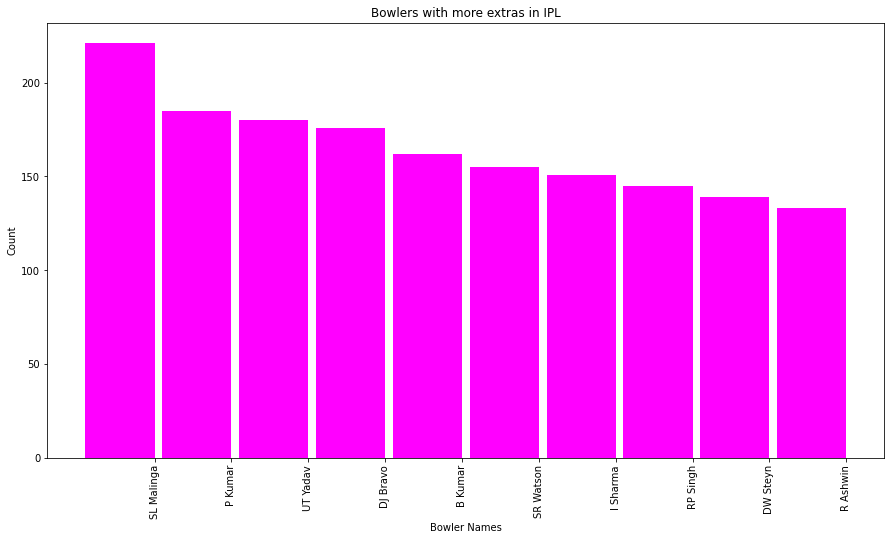

In [36]:
# Bowler with most number of extras

temp_df = score_data.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
plt.show()

SL Malinga has given most number of extras.

In [37]:
# Most wicket taking bowler

wicket_data=score_data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing'])]

In [38]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


SL Malinga has taken most number of wickets.

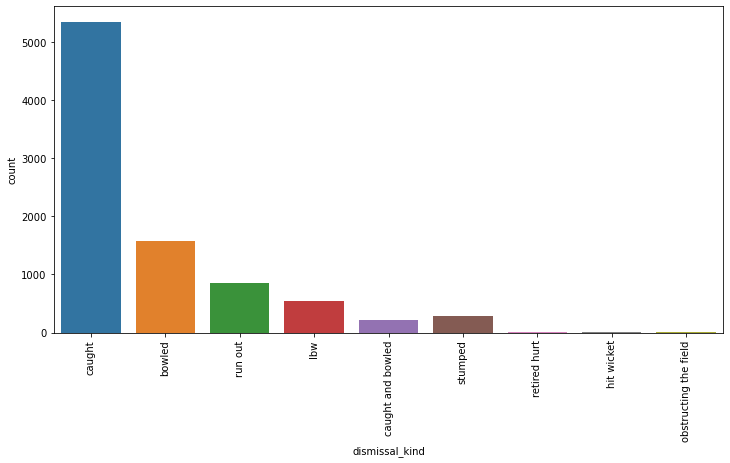

In [39]:
# Most common dismissal types in IPL

plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_data)
plt.xticks(rotation='vertical')
plt.show()

Caught is the most common mode of dismissal.

Conclusions

 - In 2013 we have had most number of matches in a season.
 - Mumbai Indians have won most matches.
 - Most of the teams prefer to field first.
 - Teams batting second have won more matches than those batting first.
 - Virat Kohli has scored most runs.
 - CH GAYLE has won maximum number of palyer of the match awards.
 - Eden Garden is the stadium where most of the matches are played.
 - S Dhawan has hit most boundaries(4's).
 - CH Gayle has hit most 6's.
 - Harbhajan Singh has bowled the most number of balls.
 - Harbhajan Singh has bowled most number of dot balls also.
 - Harbhajan Singh has bowled most number of dot balls also.
 - SL Malinga has given most number of extras.
 - SL Malinga has taken most number of wickets.
 - Caught is the most common mode of dismissal.
 - Since Mumbai Indians have won most number of matches so they can be a preferred team to endrose its product.
 - since Virat Kohli,CH Gayle and SL Malinga has scored most runs, won most player of match awards and taken most wickets respectively, so they can be preferred by a company to endrose its product.

# Keep Learning.........................................................